# Research data on sales and ratings of games

This study focuses on the gaming industry. In particular, various factors affecting game sales are being studied. A large set of data is analyzed, including data on sales of games on three continents, from 1980 to 2016, released on various gaming platforms. Within the framework of the study, three major tasks were set: Compare platforms among each other; Compare genres; Explore regional specifics.

**Data research plan:**
1. General Info
2. Data preparation
    * 2.1. form, type, NA's
    * 2.2. add total sales
3. Data analysis
    * 3.1. Game releases
    * 3.2. The popularity of gaming platforms
        * 3.2.1. Life cicle (from year to year)
        * 3.2.2. Potentialy profitable platforms
        * 3.2.3. Box plot and average
    * 3.3. Correlation between reviews and sales
    * 3.4. Comparison same games on different platforms
    * 3.5. Discovery of the gemves genre
4. Regional specifics
    * 4.1. The top five platforms
    * 4.2. The top five genres
    * 4.3. Affect of ESRB to sales 
5. Hypotheses testing
    * 5.1. Average user ratings of the Xbox One and PC platforms are the same
    * 5.2. Average user ratings for the Action and Sports genres are different.
6. General Conclusion

In [1]:
#import necessary packages
import pandas as pd
import os
import warnings #disable commands
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st

## 1. General information

In [2]:
cd = os.getcwd()
games = pd.read_csv(cd + '/datasets/games.csv')

In [3]:
games.head(10)
games.describe()
#games.corr()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
games.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Genre                 2
Name                  2
Other_sales           0
JP_sales              0
EU_sales              0
NA_sales              0
Platform              0
dtype: int64

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
len(games['Platform'].value_counts())

31

In [7]:
print('count of games:',len(games['Name'].value_counts()))
print()
print(games['Platform'].value_counts())
print()
print(games['Genre'].value_counts())
print()
print(games['Rating'].value_counts())
print()

count of games: 11559

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64



In [8]:
games[games['Name']=='Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


#### Conlusion: 
Apparenly it is necessary to lowercase colnames, convert types of the vars  "year_of_release" and "user_score", filled NA's. 

## 2. Data preparation

### 2.1. form, type, NA's

In [9]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('min'))
games['year_of_release'] = games['year_of_release'].fillna(value='2017')
games['rating'] = games['rating'].replace('K-A', 'E') 
games['year_of_release'] = games['year_of_release'].astype('int')

In [11]:
games['user_score'] = games['user_score'].fillna(value='-1')
games['user_score'] = games['user_score'].replace('tbd', '-1')
games['critic_score'] = games['critic_score'].fillna(value='-1')

games['user_score'] = games['user_score'].astype('float')
games['critic_score'] = games['critic_score'].astype('float')

games['user_score'] = games['user_score'].replace(-1, games['user_score'].mean())
games['critic_score'] = games['critic_score'].replace(-1, games['critic_score'].mean())
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [12]:
games.isna().sum().sort_values(ascending=False)

rating             6766
genre                 2
name                  2
user_score            0
critic_score          0
other_sales           0
jp_sales              0
eu_sales              0
na_sales              0
year_of_release       0
platform              0
dtype: int64

### 2.2. add total sales

In [13]:
games['total_sales'] = games['na_sales'] + games['jp_sales'] + games['eu_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,33.060844,2.689447,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,33.060844,2.689447,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,33.060844,2.689447,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,33.060844,2.689447,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,33.060844,2.689447,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,33.060844,2.689447,NaN,0.01


#### Conclusion
1. lowercase colnames
2. Convert "year_of_release" to object and "user_score" to float type
3. Filling NA's
    * "user_score" and "critic_score" - users / critics' assessment in further analysis is necessary to test the null hypothesis of equality of means and to evaluate the correlation between users / critics and sales. For this reason I need to transfer variables from the type object to a floating number, but for this I need to remove all the missing values. It is impossible to immediately replace the missed ones with the average one, since the rating is an object type. Therefore, the numbers "-1" were used as strings. Next, the variables were converted to floating point numbers, and finally -1 were replaced with the middle one.
    * "year_of_relese" - restored missing values for those games for which the year of release on other platforms was noted. Other fill to "2017" because it doesn't matter for object type, and not a 0 becouse it inconvenient for plotting.
    * "rating" - can left it as it is
    * "genre" - can left it as it is
    * "name" - can left it as it is
4. Replacing in var 'rating' K-A to E - This rating was known as Kids to Adults (K-A) until 1998, when it was renamed "Everyone"

I think "critic_" and "user_scores" missed because users or critics doesn’t give a score to all games. The same for rating. One would think that games are not popular, but games with missing score and ratings are placed on popular platforms and sold. Also they represent in all genre. And finaly, they are not old, as there are modern ones among them. Data is collected for a wide period — from 1980 to 2016, and it’s normal that some of it missed. Variable "year" of release lost some date, or like last two variables "genre" and "name" lost two values. 

## 3. Data analysis

### 3.1. Game releases

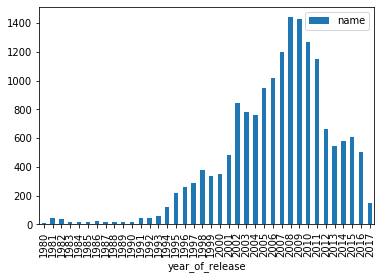

In [14]:
sales_by_years = games.groupby('year_of_release')['name'].count().reset_index()
sales_by_years.plot(x='year_of_release', y='name', kind='bar')

It can be seen that the most significant data are presented since 1993

### 3.2. The popularity of gaming platforms

#### 3.2.1. Life cicle (from year to year)

In [15]:
games_sales_total = games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
#games_sales = games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='max')
top_total = games_sales_total['platform'].head(10).tolist() 
print('from the largest to smolest platform:', top_total)

from the largest to smolest platform: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


In [16]:
games_sales_year = games.groupby(['platform','year_of_release'])['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
games_sales_total = games_sales_year.groupby('platform')['total_sales'].agg('max').sort_values(ascending=False).reset_index()
#games_sales = games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='max')
top_max = games_sales_total['platform'].head(10).tolist() 
print('from the largest to smolest platform:', top_max)

from the largest to smolest platform: ['PS2', 'Wii', 'X360', 'PS', 'PS3', 'DS', 'PS4', 'GBA', 'XB', 'GB']


from the largest to smallest platform ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


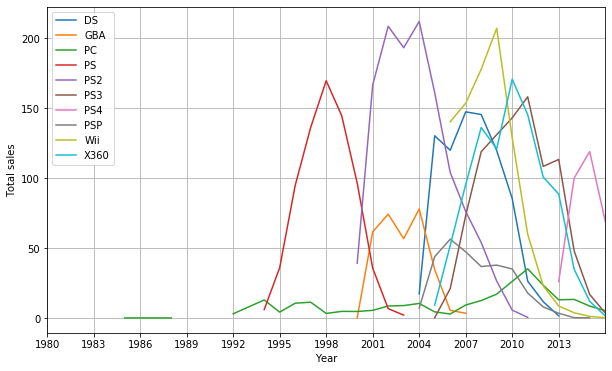

In [51]:
list = top_total
top_game_sales = (games
 .query('platform in @list')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
#.sort_values(by='total_sales',ascending=False)                  
 .reset_index()
)
platforms = top_game_sales.loc[:, top_game_sales.columns != 'year_of_release']
legend = platforms.columns.tolist()

plt.figure(figsize=(10,6))
plt.plot(top_game_sales["year_of_release"], platforms)
plt.xlim(1980, 2016)
x_ticks = np.arange(1980, 2016, 3)
plt.xticks(x_ticks)
plt.grid()

# Create legend.
plt.legend(legend, loc='upper left')
plt.xlabel('Year')
plt.ylabel('Total sales')

print('from the largest to smallest platform', platforms.sum().sort_values(ascending=False).reset_index()['platform'].tolist())

In [18]:
print('median platform life expectancy: {:.1f} years'.format(platforms.count().sort_values(ascending=False).reset_index()[0].median()))
print('mean platform life expectancy: {:.1f} years'.format(platforms.count().sort_values(ascending=False).reset_index()[0].mean()))
print('life cycle of the platform in years:')
platforms.count().sort_values(ascending=False).reset_index()

median platform life expectancy: 12.5 years
mean platform life expectancy: 12.9 years
life cycle of the platform in years:


,platform,0
0,PC,27
1,PS3,14
2,PS2,14
3,X360,13
4,PSP,13
5,Wii,12
6,DS,12
7,PS,11
8,GBA,9
9,PS4,4


Text(0, 0.5, 'Total sales')

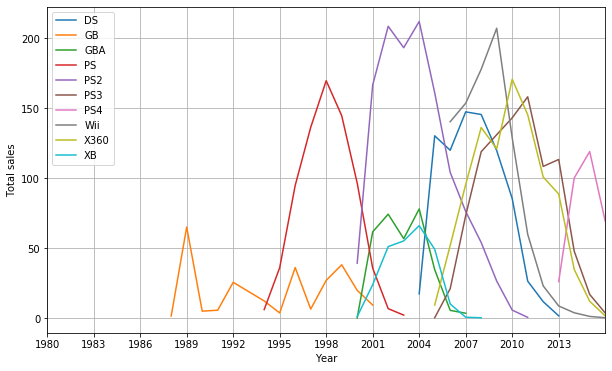

In [52]:
list = top_max
top_game_sales = (games
 .query('platform in @list')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .reset_index()
)
platforms = top_game_sales.loc[:, top_game_sales.columns != 'year_of_release']
legend = platforms.columns.tolist()
#legend = platforms.count().sort_values(ascending=False).reset_index()['platform'].tolist()

# Plot with differently-colored markers.
plt.figure(figsize=(10,6))
plt.plot(top_game_sales["year_of_release"], platforms)
plt.xlim(1980, 2016)
x_ticks = np.arange(1980, 2016, 3)
plt.xticks(x_ticks)
plt.grid()

# Create legend.
plt.legend(legend, loc='upper left')
plt.xlabel('Year')
plt.ylabel('Total sales')

Samples for all time are almost identical. For sampling with the maximum values of 'XB', 'GB', and for sampling with the maximum total values of ‘PSP ',' PC '.

In [20]:
games_sales_year = games.groupby(['platform','year_of_release'])['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
games_sales_year = games_sales_year[games_sales_year["year_of_release"] < 1993]
games_sales_total = games_sales_year.groupby('platform')['total_sales'].agg('max').sort_values(ascending=False).reset_index()
#games_sales = games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='max')
top_max_1995 = games_sales_total['platform'].head(10).tolist() 
top_max_1995

['GB', 'NES', '2600', 'SNES', 'GEN', 'PC', 'PS3', 'GG', 'DS']

In [21]:
games_sales_year = games[games["year_of_release"] < 1995]
games_sales_total = games_sales_year.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
#games_sales = games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='max')
top_total_1995 = games_sales_total['platform'].head(10).tolist() 
top_total_1995

['NES', 'SNES', 'GB', '2600', 'GEN', 'PC', 'PS', 'SAT', 'SCD', 'NG']

The same games

Text(0, 0.5, 'Total sales')

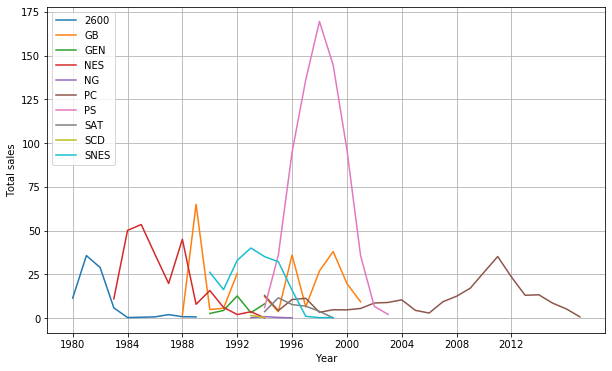

In [54]:
list = top_total_1995
top_game_sales = (games
 .query('platform in @list')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .reset_index()
)

platforms = top_game_sales.loc[:, top_game_sales.columns != 'year_of_release']
legend = platforms.columns.tolist()

# Plot with differently-colored markers.
plt.figure(figsize=(10,6))
plt.plot(top_game_sales["year_of_release"], platforms)
#plt.xlim(2000, 2016)
x_ticks = np.arange(1980, 2016, 4)
plt.xticks(x_ticks)
plt.grid()

# Create legend.
plt.legend(legend, loc='upper left')
plt.xlabel('Year')
plt.ylabel('Total sales')

#### Conclusion:

Four samples were selected. Two samples for all time and two until 1995. Two samples for all time are divided into two more: the first includes ten platforms with the highest maximum sales for a given year; the second includes platforms with maximum total sales. Samples before 1995 are divided according to the same principle. As it turned out, the same platforms fell into both samples until 1995. Samples for all time are almost identical. For sampling with the maximum values of 'XB', 'GB', and for sampling with the maximum total values of ‘PSP ',' PC '.
1. Top five by total sum of sales: 'PS2', 'X360', 'PS3', 'Wii', 'DS'
2. PS, PS2, PS3, PS4 platforms from the one series, and they are replacing one another during the release of a new platform. 
3. Wii, X360, DS the biggest since 2004
4. 'NES', 'SNES', 'GB', '2600', 'GEN' used to be popular before 2001. It seems the release of PS pushed all other platforms out of the market in 1994.
5. Median life expectancy: 12.0 years
6. Computer games could be popular, but could not break the top.

#### 3.2.2. Potentialy profitable platforms

In [23]:
games_sales_year = games[games["year_of_release"] > 2013]
games_sales_total = games_sales_year.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
#games_sales = games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='max')
top_total_2013 = games_sales_total['platform'].head(6).tolist() 
top_total_2013

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']

Text(0, 0.5, 'Total sales')

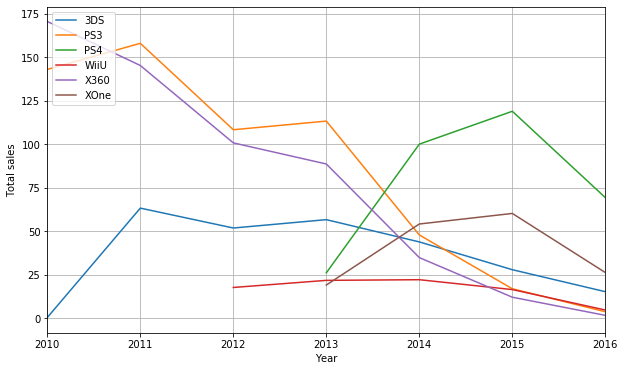

In [55]:
list = top_total_2013
top_game_sales = (games
 .query('platform in @list')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .reset_index()
)

platforms = top_game_sales.loc[:, top_game_sales.columns != 'year_of_release']
legend = platforms.columns.tolist()

# Plot with differently-colored markers.
plt.figure(figsize=(10,6))
plt.plot(top_game_sales["year_of_release"], platforms)
plt.xlim(2010, 2016)
#x_ticks = np.arange(2010, 2016, 2)
#plt.xticks(x_ticks)
plt.grid()

# Create legend.
plt.legend(legend, loc='upper left')
plt.xlabel('Year')
plt.ylabel('Total sales')

In [25]:
legend

['3DS', 'PS3', 'PS4', 'WiiU', 'X360', 'XOne']

#### Conclusion:

1. 'PS4', 'XOne', '3DS' are leading in sales in period of 2013 to 2016. This period corresponds to the range of the last two most popular platforms life cycle - 'PS3' and 'WiiU'.
2. All platforms are down. This is strange, since the life cycle of the platform is 12 years on average. And the peak of the platform 'PS4', 'XOne' was in the second year of their appearance. However, the previous graphs show that sales failures happen and may even grow. And yet, they will be in the top 6-9 years.
3. The '3DS', 'WiiU' platforms seem promising. They arose relatively recently - 2011 and 2012, respectively. Even though, sales declined, they can still grow, since the life cycle has not yet been exhausted.


#### 3.2.3. Box plot and average

Text(0.5, 1.0, 'Total sales by platform')

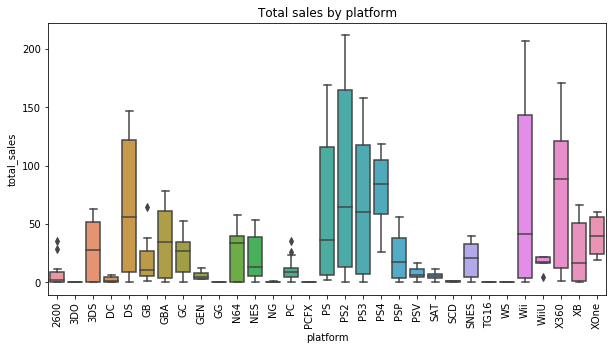

In [26]:
top_game_sales = (games
#.groupby(['year_of_release','platform'])['total_sales'].agg('sum')
 .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
 .reset_index()
)

plt.figure(figsize=(10,5))
sns.boxplot(y='total_sales', x='platform', 
                 data=top_game_sales)
plt.xticks(rotation=90)
plt.title('Total sales by platform')

#### Conclusion: 

Sales are significantly different from each other. There are platforms that stand out from the rest. For example, the PS platform line, the DS platform, Wii and 360.

#### 3.3. Correlation between reviews and sales

In [27]:
# filter top platform
top_platform = games[games['platform']=='PS3'][games['critic_score']>=0][games['user_score']>=0]
top_platform_orig = games[games['platform']=='PS3'][games['critic_score']>=0][games['user_score']>=0]

# normalizing scores of users and critics for future comparison
top_platform['critic_norm'] = (top_platform['critic_score'] - top_platform['critic_score'].mean()) / top_platform['critic_score'].std()
top_platform['user_norm'] = (top_platform['user_score'] - top_platform['user_score'].mean()) / top_platform['user_score'].std()
top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_norm,user_norm
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05,1.927738,1.265678
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.000000,5.300000,M,13.79,1.268615,-0.021987
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.000000,3.200000,M,13.33,1.504016,-0.954434
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.000000,6.400000,M,12.63,1.504016,0.466437
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.000000,7.500000,E,10.70,1.315696,0.954862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16639,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,0.00,0.01,0.00,0.00,33.060844,2.689447,NaN,0.01,-1.082530,-1.181131
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,33.060844,2.689447,NaN,0.01,-1.082530,-1.181131
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,33.060844,2.689447,NaN,0.00,-1.082530,-1.181131
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,33.060844,2.689447,NaN,0.01,-1.082530,-1.181131


In [28]:
# use pandas melt function to convert rows to columns 
top_platform = top_platform[['name', 'user_norm', 'critic_norm', 'total_sales']]
top_platform_orig = top_platform_orig[['name', 'user_score', 'critic_score', 'total_sales']]
top_platform = top_platform.melt(id_vars=["name", "total_sales"], 
                              var_name="source", 
                              value_name="score")
top_platform

,name,total_sales,source,score
0,Grand Theft Auto V,21.05,user_norm,1.265678
1,Call of Duty: Black Ops II,13.79,user_norm,-0.021987
2,Call of Duty: Modern Warfare 3,13.33,user_norm,-0.954434
3,Call of Duty: Black Ops,12.63,user_norm,0.466437
4,Gran Turismo 5,10.70,user_norm,0.954862
...,...,...,...,...
2657,WSC REAL 09: World Snooker Championship,0.01,critic_norm,-1.082530
2658,Tsukigime Ranko's Longest Day,0.01,critic_norm,-1.082530
2659,G1 Jockey 4 2008,0.00,critic_norm,-1.082530
2660,Dynasty Warriors: Eiketsuden,0.01,critic_norm,-1.082530


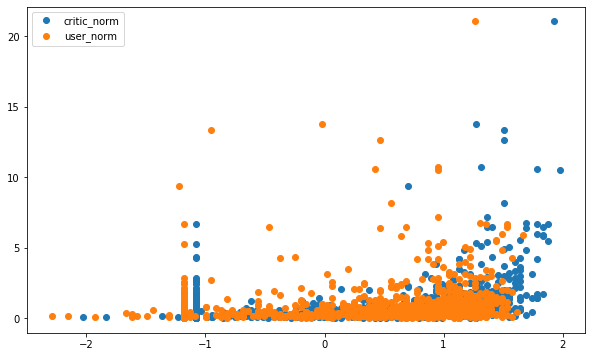

In [58]:
# building final plot
groups = top_platform.groupby('source')
plt.figure(figsize=(10,6))
for name, group in groups:
    plt.plot(group["score"], group["total_sales"], marker="o", linestyle="", label=name)
    plt.legend()

In [30]:
print(top_platform.corr())
print()
print(top_platform_orig.corr())

             total_sales     score
total_sales     1.000000  0.345542
score           0.345542  1.000000

              user_score  critic_score  total_sales
user_score      1.000000      0.795402     0.273713
critic_score    0.795402      1.000000     0.417371
total_sales     0.273713      0.417371     1.000000


#### Conclusion:

As can be seen from the plot, the ratings of users and critics have some relation to the number of sales. However, a correlation score indicates an insignificant relationship. The correletion between the aggregate assessment of users and critics with sales is weaker (0.28) than separate scores. Critics score and sales (0.48), Users score and sales (0.14). The vertical column on the chart can be ignored - these are the replaced missing values by the average

#### 3.4. Comparison same games on different platforms

In [31]:
# creation the list of the games from top platform to comparison with other platforms
games_list = top_platform["name"].unique()
# creation the list of the other platforms
list_top_platforms = games.groupby('platform')['name'].count().sort_values(ascending=False).head(7).reset_index()["platform"].tolist()

# filter the table
gemes_list_table = games.query('name in @games_list')
gemes_list_table = gemes_list_table.query('platform in @list_top_platforms')
gemes_list_table

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.400000,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.000000,6.300000,M,14.62
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.000000,5.300000,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,33.060844,2.689447,NaN,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,33.060844,2.689447,NaN,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,33.060844,2.689447,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,33.060844,2.689447,NaN,0.00


In [32]:
groups

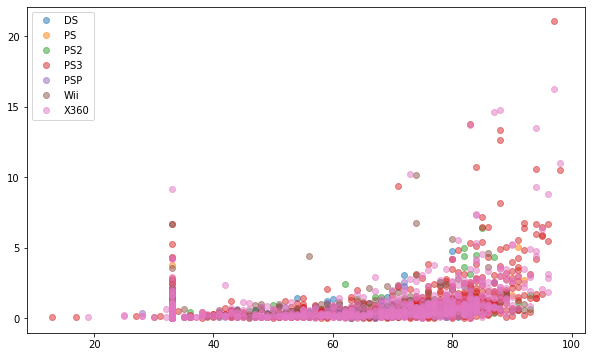

In [60]:
groups = gemes_list_table.groupby('platform')
plt.figure(figsize=(10,6))
for name, group in groups:
    plt.plot(group["critic_score"], group["total_sales"], marker="o", linestyle="", label=name, alpha=.5)
    plt.legend()

In [34]:
cor_table_platf = groups[['critic_score', 'total_sales']].corr().reset_index()
mean_corr = sum(cor_table_platf[cor_table_platf['level_1']=='total_sales']['critic_score'])/len(cor_table_platf[cor_table_platf['level_1']=='total_sales']['critic_score'])
print("mean correletion for the top platforms is ", mean_corr)

mean correletion for the top platforms is  0.3917360269033069


Sales of the same games on other platforms looks the same. But the test showed sales for the PS's line has an average correlation of around .45. However, for other platforms, the correlation is less.

#### 3.5. Discovery of the games genre

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

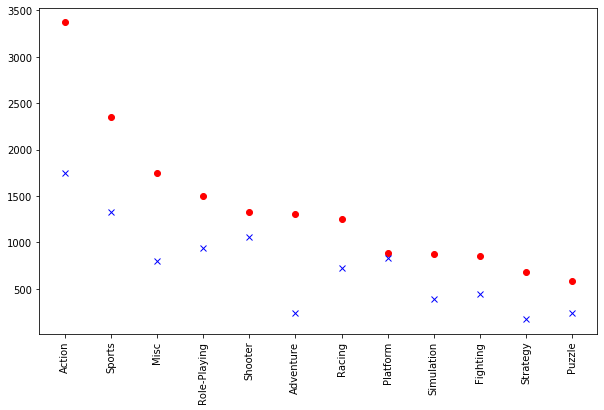

In [61]:
genre_count = games.groupby('genre')['total_sales'].agg(['count','sum']).reset_index().sort_values(by='count', ascending=False)
genre_sum = games.groupby('genre')['total_sales'].agg(['count','sum']).reset_index().sort_values(by='sum', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(genre_count["genre"], genre_count["count"], marker="o", linestyle="", color='red')
plt.plot(genre_sum["genre"], genre_sum["sum"], marker="x", linestyle="", color='blue')
plt.xticks(rotation=90)

#### Conclusion:

* most popular and profitable genres: 'Action', 'Sports', 'Misc'
* the unpopular and least profitable: 'Fighting', 'Strategy', 'Puzzle'

It is interesting that the adventure ganre is the least popular, but brought the sales no less than the rest on average.

*popularity means the number of games released within this genre*

## 4. Regional specifics

### 4.1. The top five platforms

(0, 1.5)

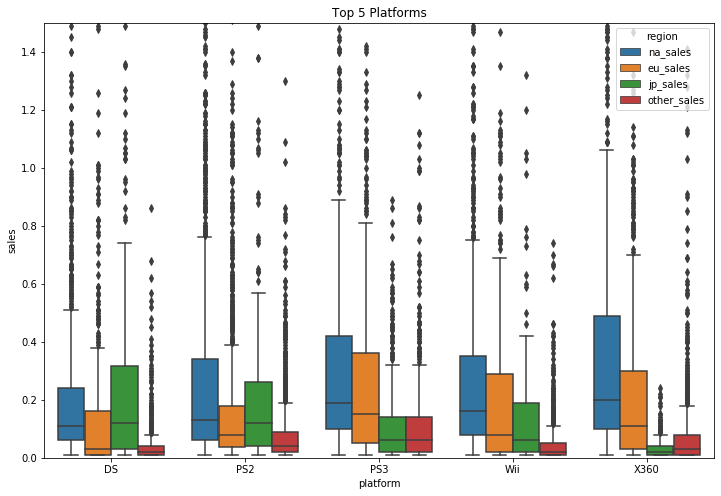

In [36]:
list_top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
list_top_genres = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform',]
region_sales = games[["platform", "genre", "rating", "na_sales", "eu_sales", "jp_sales", "other_sales"]]
region_sales = region_sales.melt(id_vars=["platform", "genre", "rating"], 
                              var_name="region", 
                              value_name="sales")

def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

table_top_platforms = region_sales.query('platform in @list_top_platforms')

table_top_platforms = table_top_platforms[table_top_platforms['sales']>0]
table_top_platforms = table_top_platforms[~table_top_platforms.groupby(['rating','region'])['sales'].apply(is_outlier).fillna(value=True)]

plt.figure(figsize=(12,8))
sns.boxplot(y='sales', x='platform', 
                 data=table_top_platforms, 
                 #palette="colorblind",
                #dodge=True,
                 hue='region')
plt.title('Top 5 Platforms')
plt.ylim(0, 1.5)


#### Conclusion:

By platforms:
* DS – most popular in Japan and America, less in Europe. 
* PS2 – most popular in America than in Japan, less in Europe. 
* PS3 – become the most popular in America and in Europe, then in Japan
* Wii – the same tendency as PS3 
* X360 – the same tendency as PS3. But US has a significant margin.

By ragions:
* Japan paly in DS and PS2
* US in PS3 and X360
* EU in PS3, Wii, 360

### 4.2. The top five genres

(0, 1.5)

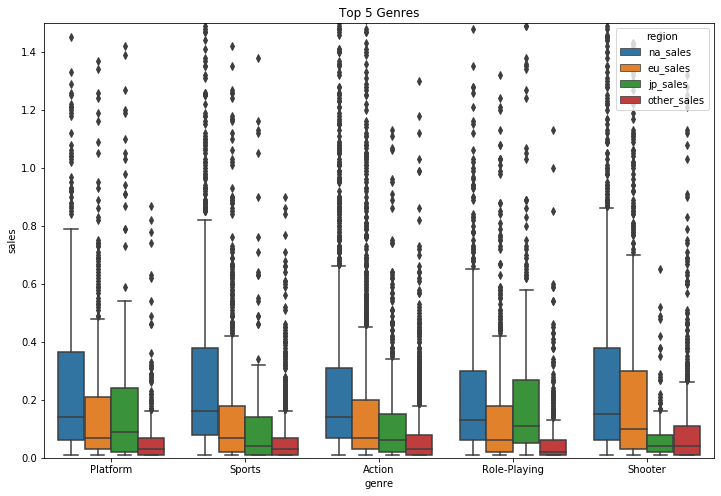

In [37]:
table_top_genres = region_sales.query('genre in @list_top_genres')

table_top_genres = table_top_genres[table_top_genres['sales']>0]
table_top_genres = table_top_genres[~table_top_genres.groupby(['rating','region'])['sales'].apply(is_outlier).fillna(value=True)]

plt.figure(figsize=(12,8))
sns.boxplot(y='sales', x='genre', 
                 data=table_top_genres, 
                 #palette="colorblind",
                #dodge=True,
                 hue='region')
plt.title('Top 5 Genres')
plt.ylim(0, 1.5)

#### Conclusion:

By platforms:
* Platform – most popular in US and Japan, less in Europe. 
* Sports – significant advantage in US
* Action –most popular in America and in Europe, then in Japan
* Role-Playing – most popular in US and Japan, less in Europe
* Shooter – very popular in US and EU, and not popular in Japan

By ragions:
* in Japan buy Role-Play and Platform games
* US prefer wide range of genre: shooter, action, sport, platform
* EU favors Shooter more then other genre

### 4.3. Affect of ESRB to sales

(0, 2.5)

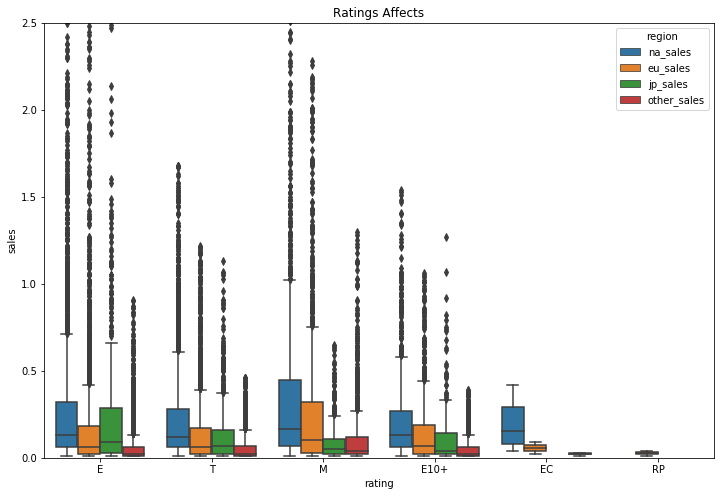

In [38]:
reg_sales_del_outl = region_sales[region_sales['sales']>0]
reg_sales_del_outl = reg_sales_del_outl[~reg_sales_del_outl.groupby(['rating','region'])['sales'].apply(is_outlier).fillna(value=True)]

plt.figure(figsize=(12,8))
sns.boxplot(y='sales', x='rating', 
                 data=reg_sales_del_outl, 
                 #palette="colorblind",
                #dodge=True,
                 hue='region')
plt.title('Ratings Affects')
plt.ylim(0, 2.5)

In [39]:
games.groupby('rating')['total_sales'].sum().sort_values(ascending=False).reset_index()

,rating,total_sales
0,E,2439.84
1,T,1493.35
2,M,1473.79
3,E10+,655.60
4,AO,1.96
5,EC,1.75
6,RP,0.09


#### Conclusion:

Ratings:
* E Everyone
* T Teen (13>)
* M Mature (17>)
* E10+ Everyone 10+
* EC Early Childhood
* RP Rating Pending
* AO Adults Only

Top 3 best selling games ratings: E, T, M
the older the audience, the more sold games.

EС-rated games are not popular in Japan and Europe

AO and RP dropped out of comparison, since their sales compared to others are insignificant.

By ragions:
* in the USA there is an audience for all ages
* Games for everyone are popular in Japan, and T, M, and E10 + are equally less popular.
* In Europe, games with a rating of M are popular and less popular, at an equal level of E, T, and E10 +

## Hypotheses testing

### 5.1. Average user ratings of the Xbox One and PC platforms are the same

In [40]:
XOne_data = games[games['platform']=='XOne']
PC_data = games[games['platform']=='PC']

print(PC_data['user_score'].mean())
print(XOne_data['user_score'].mean())

6.146557605121778
5.513012264433145


In [41]:
#First hypothesis
print("Null hypotheses - user rating mean of two platforms are not differ")
results_platforms = st.ttest_ind(
        XOne_data['user_score'], 
        PC_data['user_score'])
print('p-value: ', results_platforms.pvalue.round(4))
if (results_platforms.pvalue < 0.01):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")
print()

Null hypotheses - user rating mean of two platforms are not differ
p-value:  0.0001
We reject the null hypothesis



#### Conclusion:
User ratings for the two platforms are significantly different, both with soft and hard criteria of significance. Platform PC got higher average score.

### 5.2. Average user ratings for the Action and Sports genres are different.

In [42]:
Action_data = games[games['genre']=='Action']
Sports_data = games[games['genre']=='Sports']

print(Sports_data['user_score'].mean())
print(Action_data['user_score'].mean())

4.69615035052508
5.0602428984438665


In [43]:
#First hypothesis
print("Null hypotheses - user rating mean of two genres are not differ")
results_genre = st.ttest_ind(
        Action_data['user_score'], 
        Sports_data['user_score'])
print('p-value: ', results_genre.pvalue.round(10))
if (results_genre.pvalue < 0.01):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")
print()

Null hypotheses - user rating mean of two genres are not differ
p-value:  1.99e-08
We reject the null hypothesis



#### Conclusion:

User ratings for the two genres vary significantly even with the hard criteria of significance. This means that the differences in the estimates are not accidental. And Action games got a higher average rating.

## General Conclusion

This work was devoted to a study of the sales of 11,559 games released on 31 gaming platforms on three continents, from 1980 to 2016. Most of the data was collected from 1993.

Among the conclusions **about the platforms**, the main ones can be noted:

    1. Top five by total sum of sales: 'PS2', 'X360', 'PS3', 'Wii', 'DS'
    2. Wii, X360, DS the biggest since 2004
    3. 'NES', 'SNES', 'GB', '2600', 'GEN' used to be popular before 2001. It seems the release of PS pushed all other platforms out of the market in 1994.
    4. Median life expectancy: 12.0 years
    5. Computer games could be popular but could not break the top.
    6. The '3DS', 'WiiU' platforms seem promising. They arose relatively recently - 2011 and 2012, respectively. Even though, sales declined, they can still grow, since the life cycle has not yet been exhausted.
    7. Sales are significantly different from each other. There are platforms that stand out from the rest. For example, the PS platform line, the DS platform, Wii and 360.
    8. PC platform has higher user score then Xbox One

A slight positive average correlation (0.39) was found between critics' ratings and sales of games for top platforms.

**Regarding genres**, it was revealed that

    • most popular and profitable genres: 'Action', 'Sports', 'Misc'
    • the unpopular and least profitable: 'Fighting', 'Strategy', 'Puzzle'
    • action games have higher user score than sports

Speaking of **regional specifics**, then:

    • Japan paly in DS and PS2. People buy Role-Play and Platform games. Games for everyone are popular in Japan, and T, M, and E10 + are equally less popular.
    • US play PS3 and X360. Users prefer wide range of genre: shooter, action, sport, platform. In the USA there is an audience for all ages.
    • EU prefer PS3, Wii and 360. Also EU's users favors Shooter more than other genre. Games with a rating of M are popular and less popular, at an equal level of E, T, and E10 +